## **Anomaly Detection: Concept and Importance**
### **What is Anomaly Detection?**
Anomaly Detection is the process of identifying **unusual patterns or behaviors** in data that do not conform to expected normal behavior. These anomalies can represent **fraudulent transactions, network intrusions, equipment failures, or rare events** in various domains.

### **Why is Anomaly Detection Needed?**
1. **Fraud Detection**: Identifying fraudulent transactions in banking and finance.
2. **Cybersecurity**: Detecting unauthorized access or intrusions in networks.
3. **Healthcare**: Spotting unusual medical conditions or disease outbreaks.
4. **Manufacturing**: Detecting faults in production lines before failure.
5. **IoT & Sensor Networks**: Identifying abnormal sensor readings in smart systems.

---

## **Mathematical Intuition Behind Anomaly Detection**
Anomalies are typically detected by measuring **deviations** from normal behavior using statistical, probabilistic, or machine learning methods.

### **1. Statistical Methods**
- **Z-Score (Standard Score Method)**  
  Assumes data follows a normal distribution and detects outliers based on standard deviation.

  \[
  Z = \frac{x - \mu}{\sigma}
  \]
  - \( x \) is the observed value.
  - \( \mu \) is the mean of the dataset.
  - \( \sigma \) is the standard deviation.

  If \( |Z| > 3 \), the point is considered an anomaly.

- **Interquartile Range (IQR) Method**
  - Defines anomalies as data points that fall outside:
    \[
    \text{Lower Bound} = Q1 - 1.5 \times IQR
    \]
    \[
    \text{Upper Bound} = Q3 + 1.5 \times IQR
    \]
  - Where **IQR (Interquartile Range) = Q3 - Q1**.

### **2. Probabilistic Models**
- **Gaussian Mixture Models (GMMs)**:  
  - Models data as a mixture of multiple Gaussian distributions.
  - Anomalies have very low probability under the learned distribution.

  \[
  P(x) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x | \mu_k, \Sigma_k)
  \]

  - If \( P(x) \) is very small, \( x \) is an anomaly.

### **3. Distance-Based Methods**
- **K-Nearest Neighbors (KNN)**:  
  - Compute the average distance of a point from its \( k \)-nearest neighbors.
  - If the distance is significantly larger than others, it is considered an anomaly.

  \[
  D(i) = \frac{1}{k} \sum_{j \in KNN(i)} d(i, j)
  \]

### **4. Machine Learning Approaches**
- **Isolation Forest**:
  - Randomly partitions data using decision trees.
  - Anomalies are isolated faster since they require fewer splits.

- **Autoencoders (Deep Learning)**:
  - Train a neural network to reconstruct normal data.
  - Reconstruction error is high for anomalies.

  \[
  \text{Reconstruction Error} = || X - X' ||^2
  \]

  - If the error exceeds a threshold, it is classified as an anomaly.

---

### **Key Takeaways**
- **Anomalies deviate from normal patterns** and can be detected using statistical, probabilistic, or machine learning models.
- **Choice of method depends on the type of data**: structured (tabular), sequential (time series), or unstructured (images, text).
- **Setting thresholds is crucial**: Too strict → many false positives; Too loose → missed anomalies.

Would you like a Python implementation of an anomaly detection method? 🚀

Isolation Forest Algorithm ek machine learning technique hai jo anomalies ya outliers ko detect karne ke liye use hoti hai.

Yeh algorithm "isolate" karne ke liye observations ka istemal karti hai. Iska process kuch is tarah hai:

1. **Feature Selection**: Pehle, yeh algorithm ek feature (ya column) ko randomly select karti hai.
2. **Splitting Value**: Phir, us selected feature ke maximum aur minimum values ke beech mein ek random split value chuni jati hai.

Yeh process recursive partitioning ke jaisa hota hai aur isko tree structure mein represent kiya ja sakta hai. Kisi sample ko isolate karne ke liye jo splits chahiye hote hain, unka count us tree ke root node se us sample ke terminating node tak ke path length ke barabar hota hai.

3. **Path Length**: Agar kisi sample ke liye yeh path length chhoti hai, toh iska matlab yeh hai ki wo sample anomaly hai. Isliye, jab ek forest (bohot saare random trees) banate hain aur un trees ke average path lengths ko dekhte hain, toh agar kisi sample ka path length zyada chhota hai, toh wo sample anomaly hone ki sambhavna rakhta hai.

Essentially, agar random partitioning kisi sample ke liye noticeably shorter paths produce karti hai, toh yeh indicate karta hai ki wo sample likely anomalous hai. 

Yeh algorithm outliers ko efficiently detect karne ka ek effective tareeqa hai.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('healthcare.csv')

In [3]:
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


In [4]:
df.columns

Index(['0', '1'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       250 non-null    float64
 1   1       250 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB


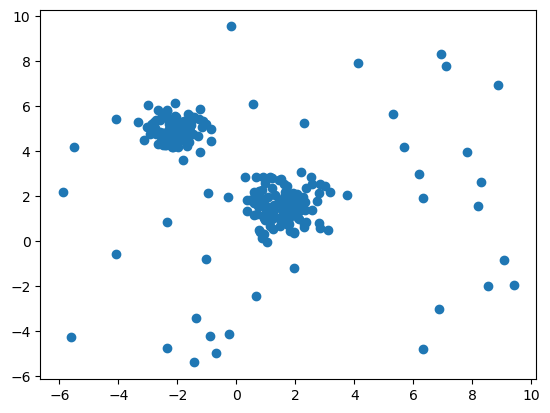

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [7]:
from sklearn.ensemble import IsolationForest

In [8]:
clf = IsolationForest(contamination=0.2)
clf.fit(df)
predictions = clf.predict(df)

In [9]:
predictions

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [10]:
import numpy as np
index = np.where(predictions < 0)
index

(array([  4,  20,  24,  40,  45,  48,  53,  55,  60,  61,  62,  63,  67,
         72,  74,  78,  83,  85,  87,  89,  92,  97, 104, 108, 114, 119,
        126, 130, 132, 133, 141, 151, 160, 167, 177, 179, 182, 187, 197,
        199, 204, 209, 212, 217, 220, 221, 227, 242, 247, 248], dtype=int64),)

In [11]:
x=df.values

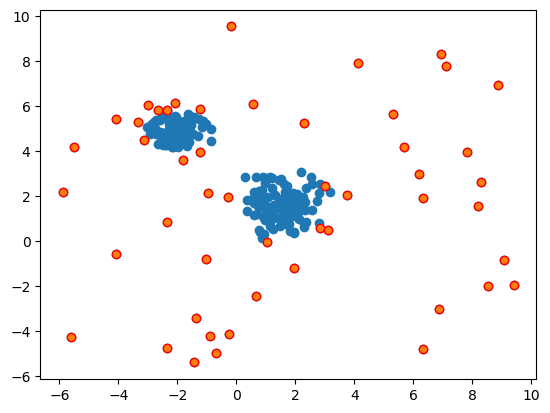

In [12]:
index = np.where(predictions < 0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors="r")